## La libreria pillow

Pillow es un *fork* de la libreria PIL (*Python Image Library*)
Con __pillow__ añadimos a Python la capacidad de procesar imágenes.

###  Instalacion de Pillow

Se puede instala con pip.

In [2]:
!pip install pillow

  Using cached Pillow-7.1.1-cp36-cp36m-manylinux1_x86_64.whl (2.1 MB)


### Caracterísitcas más importantes

- **Acepta múltiples formatos**: Pillow soporta muchos formatos de archivos
usados para almacenaminto de imágenes, entre otros BMP (*Windows Bitmaps*),
EPS (*Encapsulated Postscript*), GIF (*Graphics Interchange Format*),
ICO (*Windows Icons*), JPEG (*Joint Photographic Experts Group*), PNG
(*Portable Network Graphic*), TGA (*Truevision Graphics Adapter*),
TIFF (*Tagged Image File Format*)...

- **Un sistema muy eficiente** para representar las imágenes en memoria. La
  librería está diseñada para permitir un acceso rápido y eficiente a los
  pixels de las imágenes, lo que permite usarlo como una base de desarrollo
  para procesar imágenes.

- **Varios algoritmos** habituales del procesamiento de imágenes ya vienen
incluidos en la librería.

Algunos usos posibles de esta librería:

- Archivado y proceso de imágenes por lotes. La librería permite crear
  *thumbnails*, convertir entre formatos, rotar, cambiar el tamaño, 
  imprimir imágenes, etc.

- Presentar imágenes. La versión actual incluye una interfaz Tk, asi 
  como controles que pueden ser usados en otros sistemas de ventanas
  como PythonWin.

- Proceso de imágenes: La librería incluye operaciones básicas de
  modificación de imagenes, que funciona a nivel de pixels, y operaciones
  de más alto nivel, como filtros, nucleos de convolución y conversiones
  del espacio de colores.

- Análisis y síntesis de imágenes

### Primeros pasos: Usando la clase Image

La clase más importante dentro de la librería es la clase `Image`, definida
en el módulo con el mismo nombre. Podemos crear instancias de esta clase de
diversas formas, bien leyendo las imagenes de un fichero, procesando
otras imágenes, o creando una imagen desde cero.

Pare cargar una imagen desde disco, esamos la función `open()` dentro
del módulo `Image`:

In [8]:
from PIL import Image

im = Image.open("incredibles.webp")

En Jupyter notebook, podemos usar directamente la imagen como salida de una celda, solo hay que incluir la instancia al final de una celda.

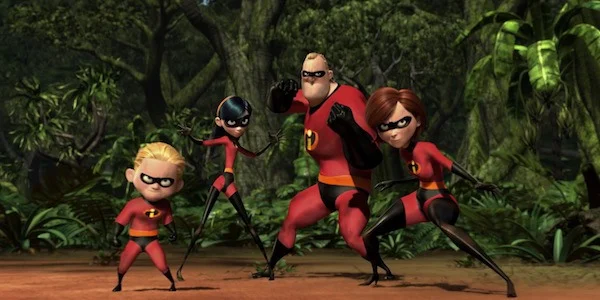

In [4]:
im

Si tiene éxito, la función devuelve un objeto de tipo `Image`. Podemos examinar
atributos de la instancia para obtener información adicional de la imagen:

In [5]:
print(im.format, im.size, im.mode)

WEBP (600, 300) RGB


- El atributo `format` identifica el formato usado para almacenar la imagen (Si
la imagen no se ha creado a partir de un fichero, `format` vale `None`). 

- El atributo `size` es una dupla que contiene el ancho y alto de la imagen, en
*pixels*. 

- El atributo `mode` nos permite saber el número y nombre de las
bandas de la imagen, así como el tipo de pixel y la profundidad. 

Algunos valores habituales de `mode` son: __`L`__ (De luminancia) para imagenes
en escala de grises, __`RGB`__ para imagenes en color real, con 24 bits de
profundidad, y __`CMYK`__, que indica una imagen preparada para usarse en sistemas
de impresión.

Una vez que tenemos la instancia de la imagen, podemos usar los diferentes métodos definidos en la clase para procesar y
manipular las imágenes.

Por ejemplo, podemos mostrar la imagen llamando al métdodo `show`.

In [6]:
im.show()

**Pregunta**: Cual es el tamaño de la imagen `leon.jpg`? Y cual es su modo

In [7]:
!ls

incredibles.webp leon.jpg         pillow.ipynb     pillow.md


In [9]:
from PIL import Image

im = Image.open("leon.jpg")
print('Tamaño de la imagen:', im.size)
print('Modo de la imagen:', im.mode)

Tamaño de la imagen: (640, 960)
Modo de la imagen: RGB


### Teoría del Color

El ojo humano dispone de una serie de células especializadas en recibir
la luz, llamados conos. Hay tres tipos distintos de conos: los sensibles
a la luz roja, los sensibles a la luz azul y los sensibles a la luz
verde.

En realidad, solo vemos esos tres colores, llamados __colores primarios__. En resto de colores se obtiene como combinación de dos o más colores primarios. Por ejemplo, el violeta sería un __color secundario__, resultado de detectar a la vez tanto rojo como azul. Sumando el rojo y el verde obtenemos el amarillo.

Los colores primarios rojo, verde y azul funcionan como tales en un sistema aditivo, es decir, un sistema que *suma* los colores, como la pantalla de ordenador. En un sistema sustractivo, como el que utilizan los pintores al mezclar los pigmentos en su paleta, los colores se *restan*. En un sistema sustractivo, los colores primarios serían Magenta (que absorbe el verde), Amarillo (que absorbe el azul) y Cyan (que absorbe el rojo).

#### Modelo RGB

Así tenemos entonces los tres colores primarios del modelo RGB: rojo,
verde y azul o lo que es lo mismo con sus nombres en inglés; Red,
Green, Blue. Este sistema se basa en sumar la luz, de forma que la composición
de los tres colores daría el blanco.

#### Modelo CMYK

En el modelo CYM los tres colores primarios son Cián (*Cyan*), Amarillo (*Yellow*) y Magenta (*Magenta*) y la mezcla de estos tres colores a partes iguales da como resultado el color negro, debido a que cada adición sustrae luz. Este modelo es el utilizado en la industria gráfica y las artes visuales.

Pero conseguir el color negro, el más barato, a base de mezclar las tintas de colores, mucho mas caras, es de genero tonto. Así que lo que se hace en este mdelo es añadir el negro como color aparte, que se representa con la K final, aunque estrictamente hablando no es necesario.
 

#### Modelo  HSV

Por completar, veremos el modelo HSV (del inglés *Hue*, *Saturation*, *Value* – Matiz, Saturación, Valor), también llamado HSB (*Hue*, *Saturation*, *Brightness* – Matiz, Saturación, Brillo), define un modelo de color en términos de sus componentes.

![Modelo HSV](./HSV.png)

Em modelo HSV está diseñado desde el punto de vista de la utilidad. Es muy útil usar la ruleta de color HSV para elegir un color. En ella el matiz se representa por una región circular; una región triangular separada, puede ser usada para representar la saturación y el valor del color. Normalmente, el eje horizontal del triángulo denota la saturación, mientras que el eje vertical corresponde al valor del color. De este modo, un color puede ser elegido al tomar primero el matiz de una región circular, y después seleccionar la saturación y el valor del color deseados de la región triangular.

En lo que a nosotros respecta, como estamos usando pantallas de ordenador y, por tanto, estamos generando la luz mediante un sistema aditivo, el modelo RGB es el que nos interesa usar.

En resumen, todos los colores se obtienen como combinación de tres posibles valores. Por lo tanto, para representar una imagen en color, solo tenemos que almacenar los componentes rojo, verde y azul de cada punto que compone la imagen. Al igual que con las coordenadas, que podemos guardar en forma de tupla de dos elementos, los colores se pueden expresar en forma de trios o tuplas de tres elementos, cada uno indicando, por orden, el componente rojo, verde y azul del color.

Normalmente se usan un *byte*, o sea, 8 bits, para indicar cada componente del color, lo que nos da 256 tonalidades de rojo, 256 tonalidades de verde y 256 tonalidades de azul, y todas sus combinaciones, que son 256x256x255 o, lo que es lo mismo:

$$ 2^{24} = 16777216 $$

16.777.216 colores diferentes son muchos colores. En la práctica, esto es muchisimo más preciso de lo que el ojo humano puede percibir, por lo que a veces se llama a este esquema *True Color*.

También podemos definir colores usando una cuadrupla, una tupla de cuatro valores. Los tres primeros valores corresponden a los componentes RGB del color, en el cuarto se especifica la opacidad (lo contrario de transparencia) del color, también llamada *alfa*, *valor alfa* o *canal alfa*.

Esto nos permite crear colores traslúcidos, que pueden dejar pasar parte de la luz que emiten los objetos que están detras de ellos. Un valor alfa de 255 se entiendo como totalmente opaco, una alfa de 0 es totalmente transparente; en la práctica, invisible.

In [2]:
!pip install pillow

  Using cached Pillow-7.1.1-cp37-cp37m-macosx_10_10_x86_64.whl (2.2 MB)
